# <p style="background-color:#034235;font-family:newtimeroman;color:#ffe7a0;font-size:150%;text-align:center;border-radius:20px 20px;">Application of Machine Learning Models to predict Company Bankruptcy</p>
___

Dữ liệu được thu thập từ ***Taiwan Economic Journal*** trong các năm 1999 đến 2009. Công ty phá sản được xác định dựa trên các quy định kinh doanh của Sở giao dịch chứng khoán Đài Loan (Taiwan Stock Exchange).

**DataSet Link:** https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

<a class="anchor" id="0.1"></a>
## <p style="background-color:#034235;font-family:newtimeroman;color:#ffe7a0;font-size:150%;text-align:center;border-radius:20px 20px;">Nội dung</p>

+ [**1. Load data**](#1)
    + [1.1 Import the libraries](#1.1)
    + [1.2 Load the dataset](#1.2)
+ [**2. Exploratory Data Analysis**](#2)
    + [2.1 Understanding dataset](#2.1)
    + [2.2 Data Cleaning](#2.2)
+ [**3. EDA and Visualization**](#3)
    + [3.1 Feature Selection](#3.1)
    + [3.2 Data Visualization](#3.2)
    + [3.3 Imbalanced Data](#3.3)
    + [3.4 Splitting and training](#3.4)
+ [**4. Model building**](#4)
    + [4.1 Logisitc Regression](#4.1)
    + [4.2 Naive Bayes](#4.2)
    + [4.3 KNN](#4.3)
    + [4.4 Decision Tree](#4.4)
    + [4.5 Random Forest](#4.5)
    + [4.6 SVM](#4.6)
    + [4.7 XG Boost](#4.7)
    + [4.8 CatBoost](#4.8)
    + [4.9 ANN](#4.9)
+ [**5. Result**](#5)

+ [**6. Conclusions**](#6)


# 1. Load data <a class="anchor" id="1"></a>
[**Nội dung**](#0.1)

### 1.1 Import the libraries <a class="anchor" id="1.1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load the dataset <a class="anchor" id="1.2"></a>

In [2]:
data = pd.read_csv("data.csv")
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
data.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


# 2. Exploratory Data Analysis <a class="anchor" id="2"></a>
[**Nội dung**](#0.1)

## 2.1 Understanding dataset <a class="anchor" id="2.1"></a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

**Nhận xét:** Kết quả trên cho ta biết về thông tin cơ bản của các thành phần trong dataset.

In [6]:
data.shape

(6819, 96)

**Nhận xét:** Dataset có **6819** dòng và **96** cột (bao gồm cả cột target là Bankrupt?)

In [7]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

**Nhận xét:** Không có cột nào có chứa giá trị null.

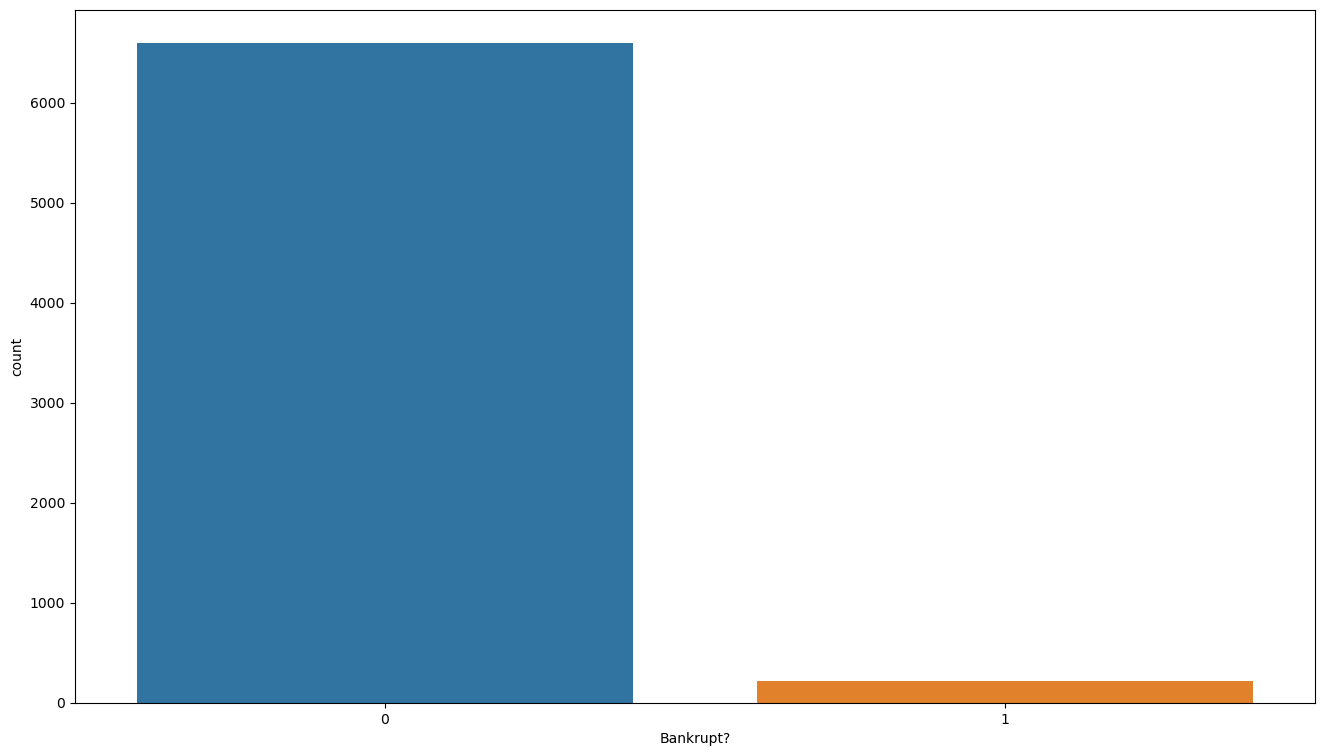

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [8]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt?', data = data)
plt.show()
print(data['Bankrupt?'].value_counts())

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


**Nhận xét tổng quan về dataset:**
+ Dataset gồm có 6819 dòng và 96 cột.
+ Không có giá trị null trong dữ liệu.
+ Bankrupt: không phá sản (0 = 6599) và phá sản (1 = 220).
+ Data Bankrupt là dạng **Imbalanced**.

## 2.2 Data Cleaning <a class="anchor" id="2.2"></a>

In [10]:
# Check if there are any duplicate rows
# data.duplicated(keep=False).sum()

In [11]:
# Xử lý dữ liệu ngoại lệ


In [12]:
# Xem dữ liệu bị thiếu
# data.isnull().values.sum() # check missing values

# 3. EDA and Visualization <a class="anchor" id="3"></a>
[**Nội dung**](#0.1)

## 3.1 Feature Selection <a class="anchor" id="3.1"></a>

In [13]:
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest

In [14]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt?'], axis=1),
    data['Bankrupt?'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

### Determine Mutual Information

In [15]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([0.03046176, 0.03329579, 0.02890363, 0.01663503, 0.01682874,
       0.01991937, 0.03060349, 0.02752987, 0.03095688, 0.03607423,
       0.00021419, 0.00083266, 0.01371651, 0.00100557, 0.01999482,
       0.03242956, 0.02913019, 0.02781702, 0.04430966, 0.00704578,
       0.00395026, 0.02310925, 0.041838  , 0.00861396, 0.00627474,
       0.012129  , 0.00941349, 0.01073979, 0.01397813, 0.00051593,
       0.01355545, 0.        , 0.02399322, 0.02833373, 0.03467377,
       0.03378879, 0.03407959, 0.03499054, 0.01067953, 0.03961152,
       0.00411073, 0.02516337, 0.0433    , 0.00500836, 0.01154959,
       0.        , 0.00126848, 0.00369168, 0.004878  , 0.        ,
       0.        , 0.02422309, 0.00701859, 0.02650192, 0.00576042,
       0.00071265, 0.01679241, 0.02089726, 0.01184867, 0.01610328,
       0.01731491, 0.0228259 , 0.00229912, 0.00270611, 0.02232087,
       0.02399633, 0.00113649, 0.03457833, 0.03417276, 0.00907948,
       0.        , 0.00297753, 0.01903018, 0.00352986, 0.00373

### Feature Importance

Text(0, 0.5, 'Mutual Information')

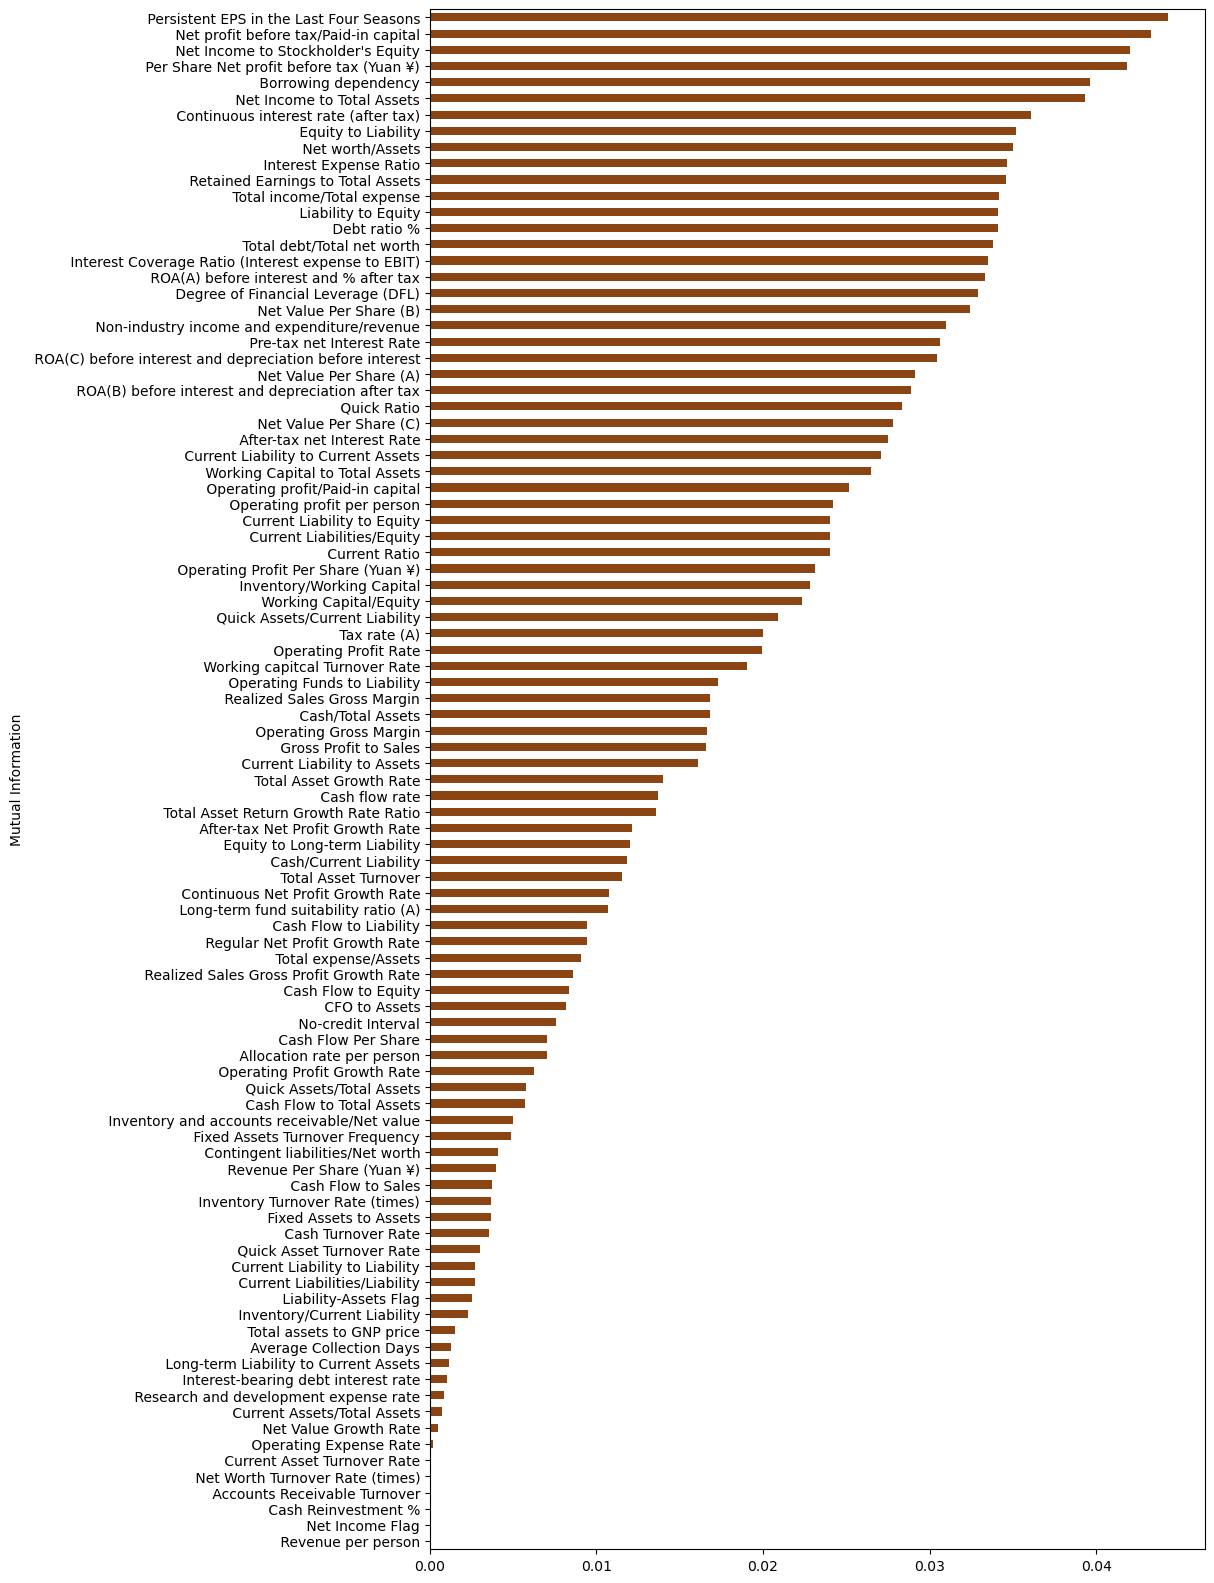

In [16]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=True).plot.barh(figsize=(10, 20), color = '#8B4513')
plt.ylabel('Mutual Information')

**Nhận xét:**
+ Thứ tự các feature có ảnh hưởng đến bankruptcy được sort từ cao đến thấp.
+ 10 features có tác động lớn gồm:
    + Continuous interest rate (after tax),
    + Persistent EPS in the Last Four Seasons
    + Per Share Net profit before tax (Yuan ¥)
    + Debt ratio %
    + Net worth/Assets
    + Borrowing dependency
    + Net profit before tax/Paid-in capital
    + Net Income to Total Assets
    + Net Income to Stockholder's Equity
    + Equity to Liability
    + ...

### Select top k features based on MI

In [17]:
# here we will select the top 10 features
# based on their mutual information value

# select features
top_features = SelectKBest(mutual_info_classif, k=10) # k = 10
sel_ = top_features.fit(X_train, y_train) 

# display features
X_train.columns[sel_.get_support()]

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Retained Earnings to Total Assets', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3.2 Data Visualization <a class="anchor" id="3.2"></a>

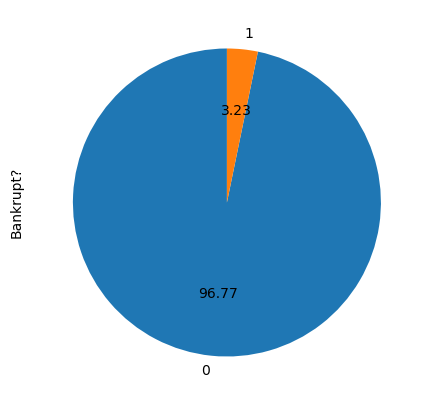

In [19]:
plt.figure(figsize=(5, 5))
data['Bankrupt?'].value_counts().plot(kind='pie', autopct="%.2f", startangle = 90)
plt.show();

## 3.3 Imbalanced Data <a class="anchor" id="3.3"></a>

In [20]:
# Using SMOTE method to over sample the data
x, y = data.drop('Bankrupt?',axis=1),data['Bankrupt?']
x.shape, y.shape

((6819, 95), (6819,))

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_resample(x,y)

In [22]:
x.shape,y.shape

((13198, 95), (13198,))

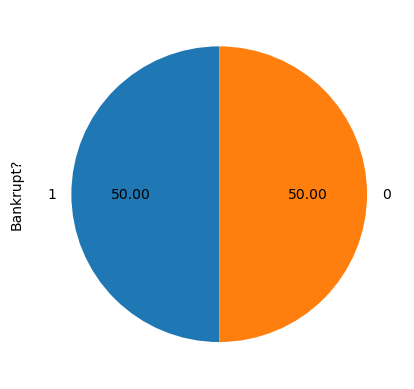

In [23]:
y.value_counts().plot(kind='pie',autopct="%.2f", startangle = 90)
plt.show()

**Nhận xét:** sau khi điều chỉnh, dữ liệu trở thành dạng Balance.

### 3.4 Splitting and training <a class="anchor" id="3.4"></a>

In [24]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt?'], axis=1),
    data['Bankrupt?'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

In [25]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [26]:
X_train.shape, X_test.shape

((4773, 10), (2046, 10))

# 4. Model Building <a class="anchor" id="4"></a>
[**Nội dung**](#0.1)

## 4.1 Logistic Regression <a class="anchor" id="4.1"></a>

In [27]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred = LR_model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [29]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.9721407624633431


## 4.2 Naive Bayes <a class="anchor" id="4.2"></a>

### Training the Naive Bayes on the Training set

In [30]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [31]:
from sklearn.metrics import confusion_matrix

y_pred = NB_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1934   53]
 [  29   30]]


In [32]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc2}")

Accuracy score : 0.9599217986314761


## 4.3 KNN <a class="anchor" id="4.3"></a>

### Training the K-NN model on the Training set

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred = KNN_model.predict(X_test)

### KNN confusion matrix

In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1963   24]
 [  48   11]]


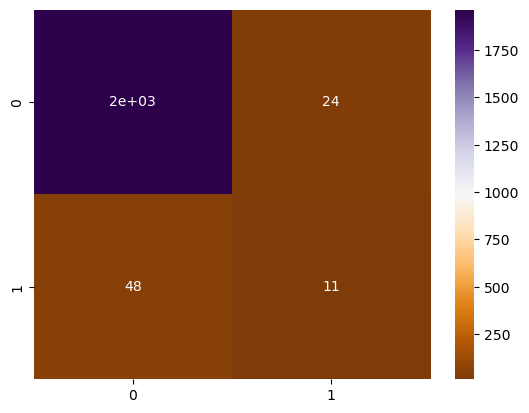

In [36]:
sns.heatmap(cm, annot=True, cmap='PuOr',)
plt.show()

In [37]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.9648093841642229


## 4.4 Decision Tree <a class="anchor" id="4.4"></a>

### Training Decision Tree Classification on Train set

In [38]:
from sklearn.tree import DecisionTreeClassifier
DTR_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTR_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
y_pred = DTR_model.predict(X_test)
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc4}")

Accuracy score: 0.9491691104594331


## 4.5 Random Forest <a class="anchor" id="4.5"></a>

### Training the Random Forest Classification model on the Training set

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [41]:
y_pred = RF_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc5 = accuracy_score(y_test, y_pred)

[[1970   17]
 [  52    7]]


In [42]:
print(f"Random Forest Classification accuracy: {acc5}")

Random Forest Classification accuracy: 0.966275659824047


## 4.6 SVM <a class="anchor" id="4.6"></a>

In [43]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0, probability=True)
SVM_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

### Predict the test set result of SVM

In [44]:
y_pred = SVM_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1987    0]
 [  59    0]]


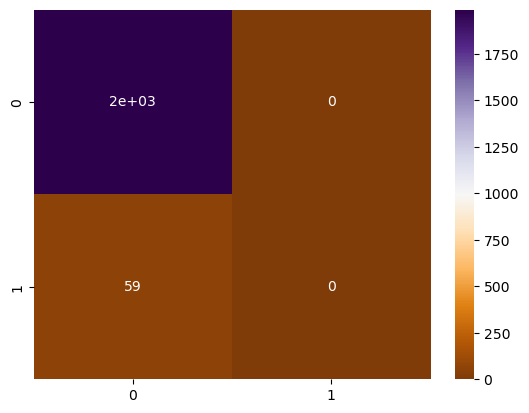

In [45]:
sns.heatmap(cm, annot=True, cmap='PuOr',)
plt.show()

In [46]:
acc6 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc6}")

Accuracy score: 0.9711632453567938


## 4.7 XGBoost <a class="anchor" id="4.7"></a>

In [47]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

### XG Boost Classifier confusion matrix

In [48]:
y_pred = XGB_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

[[1969   18]
 [  52    7]]


In [49]:
print("XG Boost classifier Acc: %0.4f" % acc7)

XG Boost classifier Acc: 0.9658


## 4.8 CatBoost <a class="anchor" id="4.8"></a>

### Training CatBoost on the Training set

In [50]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

Learning rate set to 0.020081
0:	learn: 0.6482207	total: 58.8ms	remaining: 58.7s
1:	learn: 0.6029214	total: 60.9ms	remaining: 30.4s
2:	learn: 0.5638541	total: 62.8ms	remaining: 20.9s
3:	learn: 0.5254618	total: 64.5ms	remaining: 16.1s
4:	learn: 0.4907383	total: 66.3ms	remaining: 13.2s
5:	learn: 0.4606974	total: 68.6ms	remaining: 11.4s
6:	learn: 0.4312213	total: 70.6ms	remaining: 10s
7:	learn: 0.4039973	total: 72.5ms	remaining: 8.99s
8:	learn: 0.3819417	total: 74.2ms	remaining: 8.17s
9:	learn: 0.3608585	total: 76.4ms	remaining: 7.56s
10:	learn: 0.3416828	total: 77.9ms	remaining: 7s
11:	learn: 0.3228312	total: 79.6ms	remaining: 6.55s
12:	learn: 0.3042187	total: 81.3ms	remaining: 6.17s
13:	learn: 0.2892599	total: 83.3ms	remaining: 5.87s
14:	learn: 0.2749262	total: 85.6ms	remaining: 5.62s
15:	learn: 0.2618767	total: 87.3ms	remaining: 5.37s
16:	learn: 0.2505731	total: 89ms	remaining: 5.15s
17:	learn: 0.2395916	total: 90.9ms	remaining: 4.96s
18:	learn: 0.2296361	total: 92.8ms	remaining: 4.79s

171:	learn: 0.0723271	total: 394ms	remaining: 1.89s
172:	learn: 0.0722102	total: 396ms	remaining: 1.89s
173:	learn: 0.0721524	total: 398ms	remaining: 1.89s
174:	learn: 0.0720738	total: 400ms	remaining: 1.89s
175:	learn: 0.0719742	total: 415ms	remaining: 1.94s
176:	learn: 0.0718764	total: 421ms	remaining: 1.96s
177:	learn: 0.0718479	total: 422ms	remaining: 1.95s
178:	learn: 0.0717188	total: 425ms	remaining: 1.95s
179:	learn: 0.0715762	total: 427ms	remaining: 1.95s
180:	learn: 0.0714124	total: 430ms	remaining: 1.95s
181:	learn: 0.0713890	total: 432ms	remaining: 1.94s
182:	learn: 0.0713017	total: 434ms	remaining: 1.94s
183:	learn: 0.0711596	total: 442ms	remaining: 1.96s
184:	learn: 0.0710778	total: 444ms	remaining: 1.96s
185:	learn: 0.0709608	total: 446ms	remaining: 1.95s
186:	learn: 0.0708193	total: 448ms	remaining: 1.95s
187:	learn: 0.0706978	total: 451ms	remaining: 1.95s
188:	learn: 0.0705885	total: 453ms	remaining: 1.94s
189:	learn: 0.0705002	total: 455ms	remaining: 1.94s
190:	learn: 

337:	learn: 0.0590797	total: 791ms	remaining: 1.55s
338:	learn: 0.0590605	total: 794ms	remaining: 1.55s
339:	learn: 0.0590187	total: 796ms	remaining: 1.54s
340:	learn: 0.0589817	total: 797ms	remaining: 1.54s
341:	learn: 0.0589557	total: 799ms	remaining: 1.54s
342:	learn: 0.0588918	total: 801ms	remaining: 1.53s
343:	learn: 0.0587869	total: 803ms	remaining: 1.53s
344:	learn: 0.0586875	total: 805ms	remaining: 1.53s
345:	learn: 0.0585884	total: 807ms	remaining: 1.52s
346:	learn: 0.0584931	total: 810ms	remaining: 1.52s
347:	learn: 0.0584319	total: 813ms	remaining: 1.52s
348:	learn: 0.0583533	total: 815ms	remaining: 1.52s
349:	learn: 0.0582819	total: 817ms	remaining: 1.52s
350:	learn: 0.0581659	total: 819ms	remaining: 1.51s
351:	learn: 0.0581195	total: 821ms	remaining: 1.51s
352:	learn: 0.0580589	total: 823ms	remaining: 1.51s
353:	learn: 0.0580352	total: 824ms	remaining: 1.5s
354:	learn: 0.0580004	total: 827ms	remaining: 1.5s
355:	learn: 0.0579323	total: 829ms	remaining: 1.5s
356:	learn: 0.0

521:	learn: 0.0487991	total: 1.15s	remaining: 1.05s
522:	learn: 0.0487705	total: 1.15s	remaining: 1.05s
523:	learn: 0.0487417	total: 1.16s	remaining: 1.05s
524:	learn: 0.0486712	total: 1.16s	remaining: 1.05s
525:	learn: 0.0485602	total: 1.16s	remaining: 1.05s
526:	learn: 0.0485331	total: 1.16s	remaining: 1.04s
527:	learn: 0.0485095	total: 1.16s	remaining: 1.04s
528:	learn: 0.0484869	total: 1.17s	remaining: 1.04s
529:	learn: 0.0484543	total: 1.17s	remaining: 1.04s
530:	learn: 0.0483401	total: 1.17s	remaining: 1.03s
531:	learn: 0.0482604	total: 1.17s	remaining: 1.03s
532:	learn: 0.0481995	total: 1.18s	remaining: 1.03s
533:	learn: 0.0481437	total: 1.18s	remaining: 1.03s
534:	learn: 0.0480732	total: 1.18s	remaining: 1.03s
535:	learn: 0.0480211	total: 1.18s	remaining: 1.02s
536:	learn: 0.0479553	total: 1.19s	remaining: 1.02s
537:	learn: 0.0478975	total: 1.19s	remaining: 1.02s
538:	learn: 0.0478670	total: 1.2s	remaining: 1.02s
539:	learn: 0.0478405	total: 1.2s	remaining: 1.02s
540:	learn: 0.

699:	learn: 0.0397666	total: 1.55s	remaining: 663ms
700:	learn: 0.0397157	total: 1.55s	remaining: 662ms
701:	learn: 0.0397005	total: 1.55s	remaining: 660ms
702:	learn: 0.0396762	total: 1.56s	remaining: 658ms
703:	learn: 0.0396253	total: 1.56s	remaining: 655ms
704:	learn: 0.0396103	total: 1.56s	remaining: 653ms
705:	learn: 0.0395659	total: 1.56s	remaining: 651ms
706:	learn: 0.0395135	total: 1.56s	remaining: 648ms
707:	learn: 0.0394532	total: 1.56s	remaining: 646ms
708:	learn: 0.0394087	total: 1.57s	remaining: 644ms
709:	learn: 0.0393668	total: 1.57s	remaining: 643ms
710:	learn: 0.0393522	total: 1.58s	remaining: 641ms
711:	learn: 0.0393013	total: 1.58s	remaining: 639ms
712:	learn: 0.0392793	total: 1.58s	remaining: 636ms
713:	learn: 0.0392253	total: 1.58s	remaining: 634ms
714:	learn: 0.0391819	total: 1.58s	remaining: 632ms
715:	learn: 0.0391329	total: 1.59s	remaining: 629ms
716:	learn: 0.0391007	total: 1.59s	remaining: 627ms
717:	learn: 0.0390785	total: 1.59s	remaining: 625ms
718:	learn: 

904:	learn: 0.0330607	total: 1.94s	remaining: 204ms
905:	learn: 0.0330225	total: 1.94s	remaining: 202ms
906:	learn: 0.0329841	total: 1.95s	remaining: 199ms
907:	learn: 0.0329663	total: 1.95s	remaining: 197ms
908:	learn: 0.0329264	total: 1.95s	remaining: 195ms
909:	learn: 0.0329090	total: 1.95s	remaining: 193ms
910:	learn: 0.0328886	total: 1.95s	remaining: 191ms
911:	learn: 0.0328537	total: 1.96s	remaining: 189ms
912:	learn: 0.0328338	total: 1.96s	remaining: 187ms
913:	learn: 0.0327967	total: 1.96s	remaining: 185ms
914:	learn: 0.0327649	total: 1.96s	remaining: 182ms
915:	learn: 0.0327398	total: 1.96s	remaining: 180ms
916:	learn: 0.0327062	total: 1.97s	remaining: 178ms
917:	learn: 0.0326698	total: 1.97s	remaining: 176ms
918:	learn: 0.0326265	total: 1.97s	remaining: 174ms
919:	learn: 0.0326140	total: 1.97s	remaining: 172ms
920:	learn: 0.0325972	total: 1.97s	remaining: 169ms
921:	learn: 0.0325057	total: 1.98s	remaining: 167ms
922:	learn: 0.0324979	total: 1.98s	remaining: 165ms
923:	learn: 

In [51]:
y_pred = catboost_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc8 = accuracy_score(y_test, y_pred)

[[1973   14]
 [  52    7]]


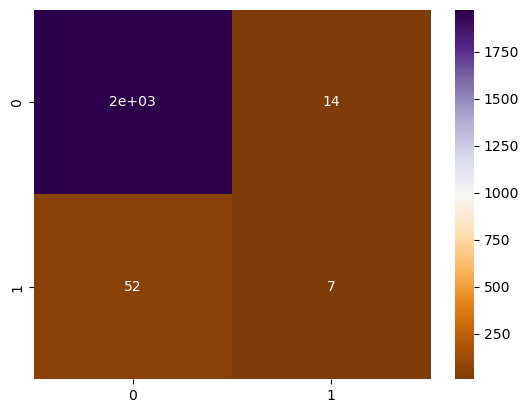

In [52]:
sns.heatmap(cm, annot=True, cmap='PuOr',)
plt.show()

In [53]:
print(acc8)

0.967741935483871


## 4.9 ANN <a class="anchor" id="4.9"></a>

In [54]:
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

2023-01-26 22:38:47.212206: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [55]:
ANN_model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(10,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

ANN_model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

2023-01-26 22:38:49.415086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:
ANN_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
150/150 [==============================] - 0s 707us/step - loss: 0.4106 - accuracy: 0.9384
Epoch 2/200
150/150 [==============================] - 0s 649us/step - loss: 0.1836 - accuracy: 0.9663
Epoch 3/200
150/150 [==============================] - 0s 591us/step - loss: 0.1494 - accuracy: 0.9663
Epoch 4/200
150/150 [==============================] - 0s 625us/step - loss: 0.1445 - accuracy: 0.9663
Epoch 5/200
150/150 [==============================] - 0s 601us/step - loss: 0.1436 - accuracy: 0.9663
Epoch 6/200
150/150 [==============================] - 0s 584us/step - loss: 0.1430 - accuracy: 0.9663
Epoch 7/200
150/150 [==============================] - 0s 580us/step - loss: 0.1423 - accuracy: 0.9663
Epoch 8/200
150/150 [==============================] - 0s 690us/step - loss: 0.1415 - accuracy: 0.9663
Epoch 9/200
150/150 [==============================] - 0s 591us/step - loss: 0.1405 - accuracy: 0.9663
Epoch 10/200
150/150 [==============================] - 0s 609us/step - l

150/150 [==============================] - 0s 559us/step - loss: 0.1018 - accuracy: 0.9669
Epoch 80/200
150/150 [==============================] - 0s 571us/step - loss: 0.1017 - accuracy: 0.9667
Epoch 81/200
150/150 [==============================] - 0s 554us/step - loss: 0.1015 - accuracy: 0.9665
Epoch 82/200
150/150 [==============================] - 0s 566us/step - loss: 0.1017 - accuracy: 0.9669
Epoch 83/200
150/150 [==============================] - 0s 557us/step - loss: 0.1016 - accuracy: 0.9667
Epoch 84/200
150/150 [==============================] - 0s 551us/step - loss: 0.1016 - accuracy: 0.9663
Epoch 85/200
150/150 [==============================] - 0s 544us/step - loss: 0.1019 - accuracy: 0.9661
Epoch 86/200
150/150 [==============================] - 0s 556us/step - loss: 0.1010 - accuracy: 0.9663
Epoch 87/200
150/150 [==============================] - 0s 561us/step - loss: 0.1017 - accuracy: 0.9661
Epoch 88/200
150/150 [==============================] - 0s 555us/step - loss:

150/150 [==============================] - 0s 558us/step - loss: 0.1004 - accuracy: 0.9656
Epoch 158/200
150/150 [==============================] - 0s 559us/step - loss: 0.1005 - accuracy: 0.9661
Epoch 159/200
150/150 [==============================] - 0s 536us/step - loss: 0.1005 - accuracy: 0.9661
Epoch 160/200
150/150 [==============================] - 0s 542us/step - loss: 0.1003 - accuracy: 0.9665
Epoch 161/200
150/150 [==============================] - 0s 544us/step - loss: 0.1011 - accuracy: 0.9661
Epoch 162/200
150/150 [==============================] - 0s 540us/step - loss: 0.1002 - accuracy: 0.9665
Epoch 163/200
150/150 [==============================] - 0s 548us/step - loss: 0.1007 - accuracy: 0.9661
Epoch 164/200
150/150 [==============================] - 0s 560us/step - loss: 0.1005 - accuracy: 0.9658
Epoch 165/200
150/150 [==============================] - 0s 536us/step - loss: 0.1004 - accuracy: 0.9663
Epoch 166/200
150/150 [==============================] - 0s 551us/ste

### Predictions

In [57]:
def predict(model,x):
    pred  = ANN_model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(7,7))
#     cmap = sns.color_palette("viridis", as_cmap=True)
    sns.heatmap(cm,annot=True,fmt='g',cmap='PuOr',
                xticklabels=['No Bankruptcy','Bankruptcy'], yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true,y_pred))

### Train Predictions

150/150 [==============================] - 0s 439us/step


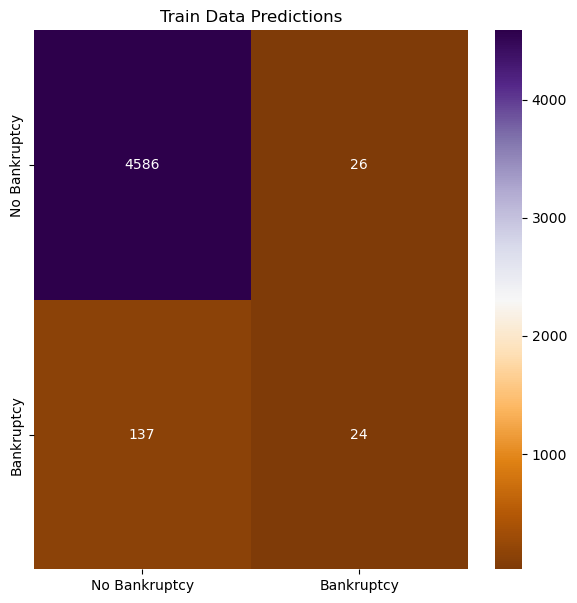



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4612
           1       0.48      0.15      0.23       161

    accuracy                           0.97      4773
   macro avg       0.73      0.57      0.61      4773
weighted avg       0.95      0.97      0.96      4773



In [58]:
y_train_pred = predict(ANN_model, X_train)
predict_graph(y_train, y_train_pred, 'Train Data Predictions')

In [59]:
acc9 = accuracy_score(y_test, y_pred)
print("Accuracy score: ", acc9)

Accuracy score:  0.967741935483871


64/64 [==============================] - 0s 440us/step


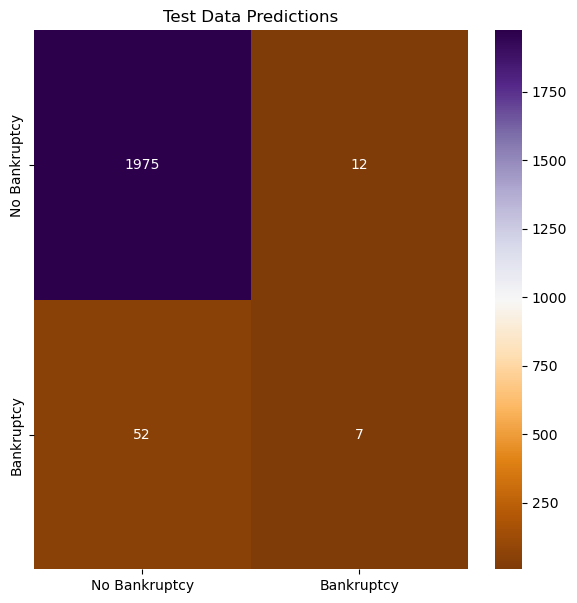



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1987
           1       0.37      0.12      0.18        59

    accuracy                           0.97      2046
   macro avg       0.67      0.56      0.58      2046
weighted avg       0.96      0.97      0.96      2046



In [60]:
# Test Predictions
y_test_pred = predict(ANN_model,X_test)
predict_graph(y_test, y_test_pred,'Test Data Predictions')

# 5. Result <a class="anchor" id="5"></a>
[**Nội dung**](#0.1)

### Compare the accuracy of the models on the training set

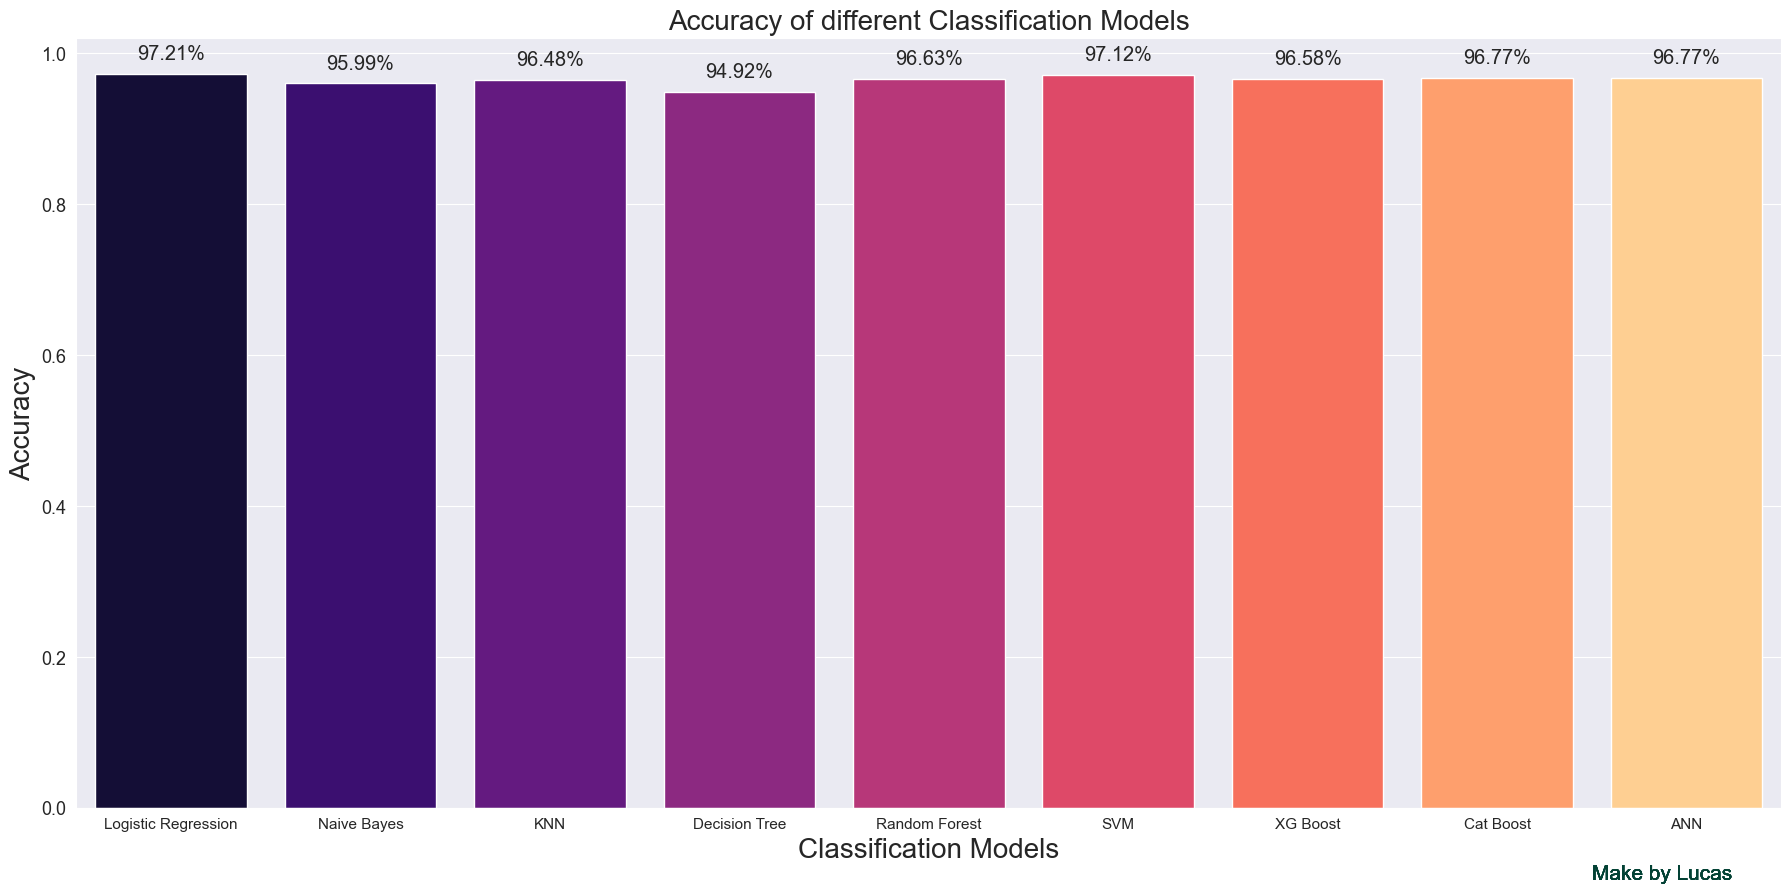

In [61]:
mylist=[]
mylist2=[]

mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("Naive Bayes")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Decision Tree")
mylist.append(acc5)
mylist2.append("Random Forest")
mylist.append(acc6)
mylist2.append("SVM")
mylist.append(acc7)
mylist2.append("XG Boost")
mylist.append(acc8)
mylist2.append("Cat Boost")

mylist.append(acc9)
mylist2.append("ANN")

plt.figure(figsize=(22, 10))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "magma", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

    # Add Text watermark
    plt.text(7.5, -0.1, 'Make by Lucas', fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)
       
plt.show();

# palette = 'Greens_d'

**Nhận xét:**
+ Các mô hình đều có Accuracy rất cao, đều trên 95%.
+ Tuy nhiên, mô hình có Accuracy **cao nhất** là **Logistic Regression**.
+ Do đó, ta lựa chọn mô hình này để tiến hành dự báo.

### ROC Curve and Area Under the Curve

In [62]:
from sklearn.metrics import roc_curve, auc

**ROC - Logistic Regression**

In [63]:
y_pred_logistic = LR_model.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

**ROC - Naive Bayes**

In [64]:
y_pred_nb = NB_model.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

**ROC - KNN**

In [65]:
y_pred_knn = KNN_model.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

**ROC - Decision Tree**

In [66]:
y_pred_dtr = DTR_model.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

**ROC - Random Forest**

In [67]:
y_pred_rfc = RF_model.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

**ROC - SVM**

In [68]:
y_pred_svm = SVM_model.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

**ROC - XG Boost**

In [69]:
y_pred_xgb = XGB_model.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

**ROC - CatBoost**

In [70]:
y_pred_catboost = catboost_model.predict_proba(X_test)[:,1]
catboost_fpr, catboost_tpr, threshold = roc_curve(y_test, y_pred_catboost)
auc_catboost = auc(catboost_fpr, catboost_tpr)

**ROC - ANN**

In [71]:
y_pred_ann = ANN_model.predict(X_test)
ann_fpr, ann_tpr, threshold = roc_curve(y_test, y_pred_ann)
auc_ann = auc(ann_fpr, ann_tpr)

64/64 [==============================] - 0s 454us/step


**ROC - Plotting Graph**

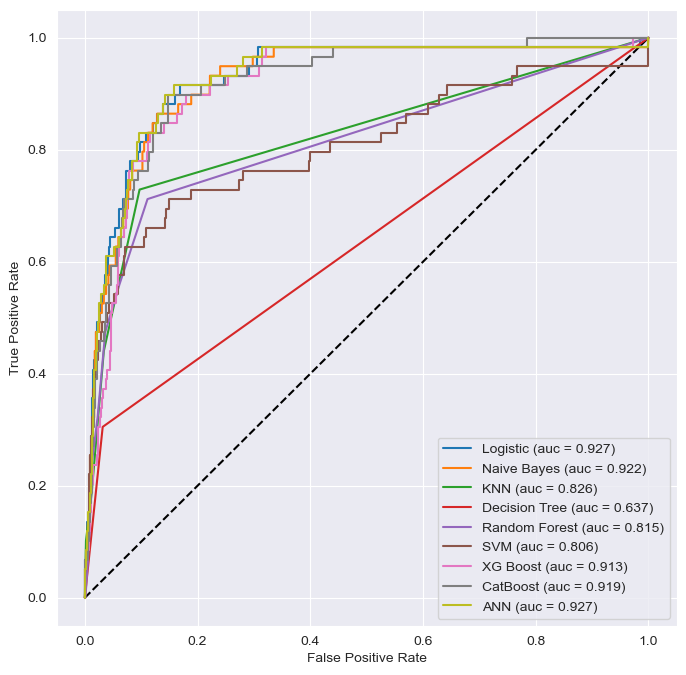

In [72]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.3f)' % auc_logistic)
# Naive Bayes
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (auc = %0.3f)' % auc_nb)
# KNN
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.3f)' % auc_knn)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.3f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.3f)' % auc_rfc)
# SVM
plt.plot(svm_fpr, svm_tpr, label='SVM (auc = %0.3f)' % auc_svm)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.3f)' % auc_xgb)
# CatBoost
plt.plot(catboost_fpr, catboost_tpr, linestyle='-', label='CatBoost (auc = %0.3f)' % auc_catboost)
# ANN
plt.plot(ann_fpr, ann_tpr, label='ANN (auc = %0.3f)' % auc_ann)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

# 6. Conclusions <a class="anchor" id="6"></a>
[**Nội dung**](#0.1)

Dự báo về vỡ nợ của công ty được sử dụng trong các lĩnh vực khác nhau trên toàn nền kinh tế. Các tập đoàn có thể chẩn đoán tình trạng hiện tại của họ dựa trên các mô hình dự đoán và thiết lập các chiến lược của họ. Các nhà điều hành có thể điều hành doanh nghiệp của họ ổn định hơn bằng cách quản lý các chỉ số chính ảnh hưởng đến rủi ro vỡ nợ của công ty. Các nhà đầu tư có thể sửa đổi chiến lược của họ và cải thiện danh mục đầu tư của họ bằng cách kiểm tra khả năng vỡ nợ của công ty. Ngoài ra, các chính phủ có thể thiết lập các chính sách an toàn vĩ mô và cải thiện các quy định tài chính liên quan bằng cách sử dụng các dự đoán vỡ nợ của công ty. Theo những cách này, các mô hình dự đoán vỡ nợ giúp thiết kế và cải thiện hệ thống tài chính. Ngoài ra, bằng cách sử dụng các thuật toán học máy và mô hình thống kê, các dự đoán vỡ nợ của công ty là ưu tiên hàng đầu của kỹ thuật tài chính tiên tiến. Cuộc khủng hoảng tài chính toàn cầu gần đây và sự gia tăng rủi ro tín dụng càng làm nổi bật tầm quan trọng của lĩnh vực này. Do tầm quan trọng của chúng, các dự đoán vỡ nợ của công ty đã được nghiên cứu rộng rãi.

Trong bài phân tích này, một số kết quả quan trọng được tìm thấy như sau:
+ Đề tài sử dụng các mô hình Machine Learning để đưa ra mô hình tốt nhất cho dự báo phá sản tại các công ty.
+ Mô hình tốt nhất đưa ra là **Logistic Regression Model**. Mặc dù ANN có accuracy có độ chính xác rất cao (auc = 92.7%). Tuy nhiên, ANN model tốn thời gian thực hiện và chạy model hơn, do đó, Logistic Regression là lựa chọn tối ưu nhất được đề xuất.
+ Độ chính xác của mô hình xây dựng được là **92.7 %**.
+ Ngoài ra, **top 10 features** có tác động lớn đến Bankruptcy gồm:
    + Continuous interest rate (after tax),
    + Persistent EPS in the Last Four Seasons
    + Per Share Net profit before tax (Yuan ¥)
    + Debt ratio %
    + Net worth/Assets
    + Borrowing dependency
    + Net profit before tax/Paid-in capital
    + Net Income to Total Assets
    + Net Income to Stockholder's Equity
    + Equity to Liability
    
Tóm lại, việc xây dựng mô hình để dự đoán rủi ro vỡ nợ (hay rủi ro phá sản) là rất quan trọng đối với mỗi doanh nghiệp. Do đó, khi thực hiện dự báo vỡ nợ doanh nghiệp, cần lựa chọn một phương pháp phù hợp để có thể cung cấp thông tin phù hợp cho mục đích dự báo, đòi hỏi phải hiểu cặn kẽ về cách sử dụng phù hợp của từng phương pháp.

**Hướng mở trong tương lai, có thể kết hợp thêm các model Machine Learning khác như `Gradient Boosted Tree`, `AdaBoost`, `Light GBM` để đưa ra model với độ chính xác cao hơn.**

**<span style="color:#034235;"> Thanks for reading this post. </span>**

_______
_Make by_**<span style="color:#034235;"> Lucas,</span>**
### <p style="background-color:#034235;font-family:newtimeroman;color:#ffe7a0;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>
______
<img src="https://github.com/LeHongNgoc3820/Lucas_viet_Blog/blob/b5e2de5a812292889e793b719572d06f3ababf2d/Logo%20ta%CC%81ch%20ne%CC%82%CC%80n.png?raw=true"
     style="width:200px;height:200px;">

**<span style="color:#034235;"> You can contact with me on:</span>**
+ **Gmail**: lehongngoc.work@gmail.com
+ **GitHub**: [LeHongNgoc3820](https://github.com/LeHongNgoc3820)
+ **Linkedln**: [Ngoc Le Hong](https://www.linkedin.com/in/ngoc-le-hong-44131b21a/)